**Converting Numerical data into Categorical data**

There is two technique. 

1. Binning (discretization)

2. Binarization

**Discretization (Binning)**

Discretization is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretization is also called binning, where bin is an alternative name for interval

Why use Discretization:

1. To handle Outliers

2. To improve the value spread



**Types of Discretization**

1. Unsupervised

    i.Equeal width(uniform) binning

    ii. Equal frequency (quantial) binning

    iii. k means binning

2. Supervised

    i. Decision tree binning

3. Custom Binning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df.shape

(891, 3)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(714, 3)

In [13]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.6293706293706294

In [21]:
#cross val score
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

np.float64(0.6330790297339592)

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans') #strategy can be uniform, quantile
kbin_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

In [23]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [24]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [26]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', strategy='kmeans'),
 'second': KBinsDiscretizer(encode='ordinal', strategy='kmeans')}

In [30]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        , 13.54505632, 25.49492263, 36.14664502, 48.33333333,
              62.        ])                                                   ],
      dtype=object)

In [31]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:, 0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [32]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(x=X_train['Fare'],
                               bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [33]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
299,50.0,3.0,247.5208,3.0,"(48.333, 62.0]","(176.319, 369.927]"
281,28.0,2.0,7.8542,0.0,"(25.495, 36.147]","(0.0, 35.744]"
493,71.0,4.0,49.5042,1.0,NaN,"(35.744, 90.827]"
332,38.0,2.0,153.4625,2.0,"(36.147, 48.333]","(90.827, 176.319]"
519,32.0,2.0,7.8958,0.0,"(25.495, 36.147]","(0.0, 35.744]"


In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [35]:
accuracy_score(y_test, y_pred2)

0.6293706293706294

In [40]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    x_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_train_trf[:, 0], color='red')
    plt.title('After')

    plt.show()

C:\Users\Lenovo\AppData\Roaming\Python\Python314\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python314\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.6372652582159624


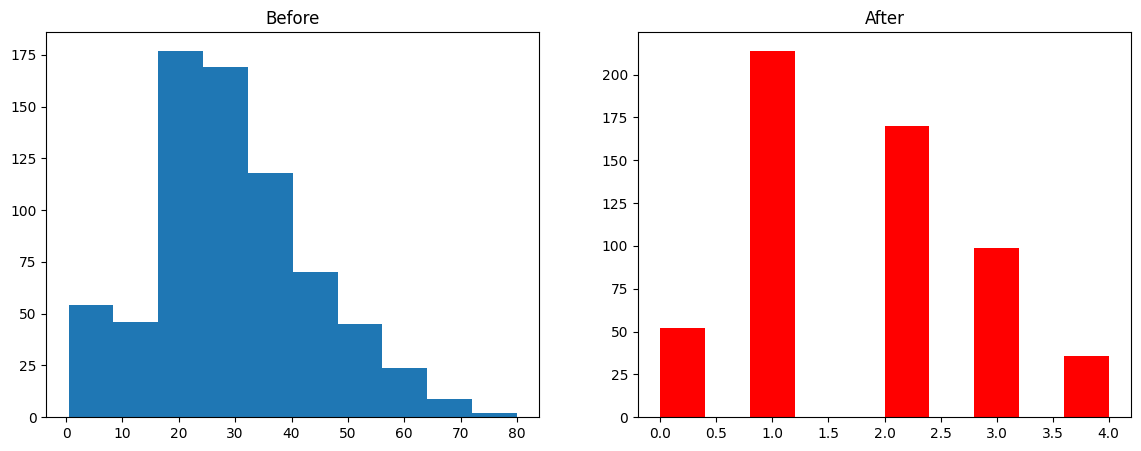

None


In [42]:
print(discretize(10, 'quantile'))